## Gradientni sestop in iskanje minimuma funkcije z enim, dvema ali več parametri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Funkcijo označimo z J; kasneje bomo isto oznako uporabljali za kriterijske funkcije. Za občutek funkcijo izrišemo.

In [2]:
def J(a):
    return (a-5)**2+3

In [3]:
a = np.arange(0,10,0.1)
y = J(a)

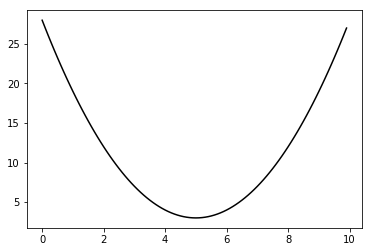

In [4]:
plt.plot(a, y, "k-");

Pri iskanju minimuma bomo za začetek uporabili numberični odvod funkcije. Kasneje in kjer se le da, bomo odvod raje dobili analitično, numerični odvod pa nam tudi tam lahko pomaga pri preverjanju pravilnosti rešitve in implementacije odvoda.

In [5]:
def derivative(f, a, eps=1e-3):
    return (f(a+eps) - f(a-eps)) / (2*eps)

Gradientni sestop pričnemo v neki začetni točki in se potem pomikamo v negativni smeri odvoda po parametru funkcije. Spodaj izvedemo določeno število iteracij. V pravi implementaciji bi morali konvergenco meriti in gradientni sestop ustaviti, ko se rešitvi približamo dovolj dobro.

In [6]:
ai = 8
for _ in range(10):
    ai = ai - 0.2 * derivative(J, ai)
    print("%.2f" % ai)

6.80
6.08
5.65
5.39
5.23
5.14
5.08
5.05
5.03
5.02


Ponovimo zgornje, le da tokrat uporabimo funckijo z dvema parametroma. Tokrat bomo gradient – torej vektor obeh parcialnih odvodov – izračunali kar analitično in ga implementirali v svoji funkciji.

In [7]:
from mpl_toolkits.mplot3d import axes3d

In [8]:
def J3(a, b):
    return (a - 1)**2 + (b + 1)**2 - 0.1*a*b

def dJ3(a, b):
    return np.array([2*(a - 1) - 0.1*b, 2*(b + 1) - 0.1*a])

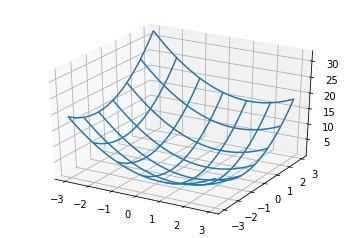

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([J3(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_wireframe(X, Y, Z, rstride=20, cstride=20);

Gradient spodaj izračunamo še numerično.

In [10]:
def grad(f, point, e=1e-3):
    return np.array([(f(*(point+eps)) - f(*(point-eps)))/(2*e)
                     for eps in np.identity(len(point)) * e])

Preverimo, ali analitična rešitev ustreza numerični.

In [11]:
x = np.array([0, 0])
grad(J3, x), dJ3(*x)

(array([-2.,  2.]), array([-2.,  2.]))

Spodaj pri gradientnem sestopu uporabimo analitično rešitev. Je hitrejša.

In [12]:
thetas = np.array([0, 0])
for _ in range(10):
    thetas = thetas - 0.2 * dJ3(*thetas)
    print(thetas)

[ 0.4 -0.4]
[ 0.632 -0.632]
[ 0.76656 -0.76656]
[ 0.8446048 -0.8446048]
[ 0.88987078 -0.88987078]
[ 0.91612505 -0.91612505]
[ 0.93135253 -0.93135253]
[ 0.94018447 -0.94018447]
[ 0.94530699 -0.94530699]
[ 0.94827806 -0.94827806]


Postopek je uporaben za funkcije s poljubnim številom parametrov.

In [13]:
def J33(theta0, theta1, theta2):
    return (theta0 - 1)**2 + (theta1 + 1)**2 + (theta2-42)**2

In [14]:
thetas = np.array([0, 0, 0])
for _ in range(10):
    thetas = thetas - 0.3 * grad(J33, thetas)
    print(thetas)

[ 0.6 -0.6 25.2]
[ 0.84 -0.84 35.28]
[ 0.936 -0.936 39.312]
[ 0.9744 -0.9744 40.9248]
[ 0.98976 -0.98976 41.56992]
[ 0.995904 -0.995904 41.827968]
[ 0.9983616 -0.9983616 41.9311872]
[ 0.99934464 -0.99934464 41.97247488]
[ 0.99973786 -0.99973786 41.98898995]
[ 0.99989514 -0.99989514 41.99559598]
